# 00 安装库，配置环境

在Python中进行可视化，我们需要的是这些库：

- 1.**matplotlib**：python中自带的，也是最常用的可视化工具包，在Jupyter中甚至可以找到matplotlib的网站
- 2.**seaborn**：python中可视化的新起之秀，致力于统计数据可视化
- 3.**brewer2mpl**：brewer2mpl是一个专供python使用的，用于访问colorbrewer2色谱的工具，colorbrewer2是一个专业颜色顾问公司

***matplotlib***

通常来说，如果我们是使用anaconda安装的python，那matplotlib是自带的

如果你发现你的python环境中没有matplotlib，那你可以使用以下命令先安装pip，然后从pip中安装matplotlib

In [1]:
#python -m pip install -U pip
#python -m pip install -U matplotlib

In [3]:
import matplotlib as mlp
print(mlp.__version__)

3.3.2


建议都更新成和菜菜一样，最少也需要3.0.1以上
如果你的版本不足，你可以使用下面的代码来更新你的版本，注意conda和pip不要混装

In [3]:
#%%cmd
#conda update matplotlib

#或者
#pip install --upgrade matplotlib

***seaborn***

seaborn是需要自己安装的。如果不是anaconda自带，建议使用pip安装

In [ ]:
#%%cmd
#pip install seaborn

In [4]:
import seaborn as sns
print(sns.__version__)

0.11.0


seaborn要求必须0.9.0以上，否则代码会报错，不足0.9.0的大家可以使用以下代码进行升级

In [ ]:
#%%cmd
#pip install --upgrade seaborn

***brewer2mpl***

同样也需要自己安装，使用以下代码：

In [ ]:
#%%cmd
#pip install brewer2mpl

不必过于在意版本，通常来说都是直接安装成最新版

***菜菜所使用的版本：***

In [5]:
import sys
print(sns.__version__)
print(mlp.__version__)

#Python版本
sys.version

0.11.0
3.3.2


'3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]'

# 第一章 关联图 Correlation

关联图是查找两个事物之间关系的图像，它能够为我们展示出一个事物随着另一个事物的变化如何变化
典型的关联图有：折线图，散点图，相关矩阵……

**我们什么时候会需要关联图呢？**

1. 数据报告 & 学术研究：

        展示趋势：比如产品销量随着时间如何变化，智力水平随着教育程度如何变化等
    
        展现状态：不同年龄的客户的成交率，不同生产成本对应的生产员工技能要求

2. 数据探索 & 数据解读：

        探索数据关系，帮助了解事实，推动研究

3. 统计学 & 机器学习：

        探索数据关系，指导数据预处理和模型选择

## 01/50 散点图

横坐标：面积大小

总坐标：总人口

图例：暂时看不出是什么总而言之看起来是类型，一种类型一个颜色

**我们的目标是：绘制出这张图，并且利用数据解读图内的信息**

***1. 导入需要的绘图库***

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#如果你在使用Jupyter Notebook，你会需要这样一句命令来让你的图像显示

***2. 先来认识一下绘制散点图的函数***

**plt.scatter()**

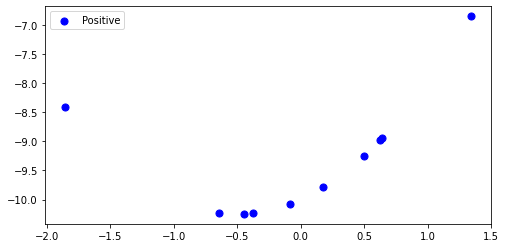

In [8]:
#绘制超简单的散点图：变量x1与x2的关系

#定义数据
x1 = np.random.randn(10) #取随机数
x2 = x1 + x1**2 - 10

#确定画布 - 当只有一个图的时候，不是必须存在
plt.figure(figsize=(8,4))

#绘图
plt.scatter(x1,x2 #横坐标，纵坐标
            ,s=50 #点的尺寸大小
            ,c="blue" #颜色
            ,label = "Positive"
            )

#装饰图形
plt.legend() #显示图例

#让图形显示
plt.show()

In [9]:
x1

array([-0.64516431,  0.17894496,  0.62453198,  0.64225259,  0.49716642,
       -0.44839985, -0.08459144,  1.34303625, -0.37348709, -1.85389118])

In [16]:
x2

array([-10.22892732,  -9.78903375,  -8.98542782,  -8.94525902,
        -9.25565914, -10.24733742, -10.07743572,  -6.85321739,
       -10.23399448,  -8.41697868])

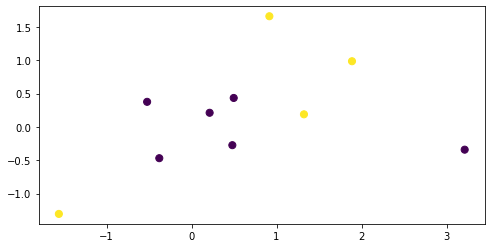

In [18]:
#来试试看一个更加稍微难一些的：除了两列X之外，还有标签y的存在
#在机器学习中，我们经常有使用标签y作为颜色来观察两种类别的分布的需求

X = np.random.randn(10,2) #10行，2列的数据集

y = np.array([0,0,1,1,0,1,0,1,0,0])

plt.figure(figsize=(8,4))

plt.scatter(X[:,0],X[:,1] #横坐标，纵坐标
            ,s=50
            ,c=y #让分类被可视化
#            ,label = ["Zero","Zero","One","One","Zero","One","Zero","One","Zero","Zero"]
           )
# plt.legend()
plt.show()

In [14]:
X[:,0]

array([-1.30012619,  0.4095665 , -1.15363648, -0.40031902,  1.35095735,
       -1.09047814,  0.7201049 ,  0.49282091, -1.19945187,  1.20082505])

In [15]:
X[:,1]

array([-0.14378262, -1.33771645, -0.80471222,  1.77355994,  0.24833007,
        0.02482846, -0.72680851, -0.57912843,  1.40979502, -1.94994725])

In [19]:
y

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

**【核心知识点】可视化分类标签时的图例**

你是否注意到了？

如果我们希望显示多种颜色的散点图，并且这个颜色是我们的标签y所代表的分类，那我们无法让散点图显示分别代表不同颜色的图例

那我们应该怎么办呢？

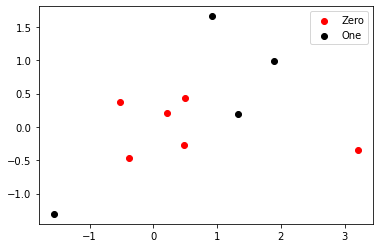

In [20]:
colors = ["red","black"] #确立颜色列表
labels = ["Zero","One"] #确立标签的类别列表

#一类标签，画一类
for i in range(X.shape[1]):
    plt.scatter(X[y==i,0],
               X[y==i,1],
               c=colors[i],
               label = labels[i])

#在标签中存在几种类别，我们就需要循环几次，一次画一个颜色的点

plt.legend()
plt.show()

In [23]:
y

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [22]:
X[y==0,0] #标签为0的所有数据

array([ 3.21349938, -0.37937265,  0.48005033,  0.21287182,  0.49629028,
       -0.52262939])

现在我们只需要找到三个因素：

1. 绘图用数据x1和x2

2. 标签的列表

3. 颜色

***3.开始认识绘图所需要的数据***

In [2]:
#导入数据
midwest = pd.read_csv("D:\Python_data_processing__Data_processing\Juanjiang_And_Caicai_Visualization\data\midwest_filter.csv")

In [8]:
#探索数据

In [9]:
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


In [10]:
midwest.columns

Index(['PID', 'county', 'state', 'area', 'poptotal', 'popdensity', 'popwhite',
       'popblack', 'popamerindian', 'popasian', 'popother', 'percwhite',
       'percblack', 'percamerindan', 'percasian', 'percother', 'popadults',
       'perchsd', 'percollege', 'percprof', 'poppovertyknown',
       'percpovertyknown', 'percbelowpoverty', 'percchildbelowpovert',
       'percadultpoverty', 'percelderlypoverty', 'inmetro', 'category',
       'dot_size'],
      dtype='object')

In [11]:
#给大家翻译了一下：
["城市ID","郡","州","面积","总人口","人口密度","白人人口","非裔人口","美洲印第安人人口","亚洲人口","其他人种人口"
,"白人所占比例","非裔所占比例","美洲印第安人所占比例","亚洲人所占比例","其他人种比例"
,"成年人口","具有高中文凭的比率","大学文凭比例","有工作的人群比例"
,"已知贫困人口","已知贫困人口的比例","贫困线以下的人的比例","贫困线以下的儿童所占比例","贫困的成年人所占的比例","贫困的老年人所占的比例"
,"是否拥有地铁","标签","点的尺寸"]

#看见我们的横纵坐标了吗？

['城市ID',
 '郡',
 '州',
 '面积',
 '总人口',
 '人口密度',
 '白人人口',
 '非裔人口',
 '美洲印第安人人口',
 '亚洲人口',
 '其他人种人口',
 '白人所占比例',
 '非裔所占比例',
 '美洲印第安人所占比例',
 '亚洲人所占比例',
 '其他人种比例',
 '成年人口',
 '具有高中文凭的比率',
 '大学文凭比例',
 '有工作的人群比例',
 '已知贫困人口',
 '已知贫困人口的比例',
 '贫困线以下的人的比例',
 '贫困线以下的儿童所占比例',
 '贫困的成年人所占的比例',
 '贫困的老年人所占的比例',
 '是否拥有地铁',
 '标签',
 '点的尺寸']

***4.准备标签的列表和颜色***

**标签**

In [12]:
midwest['category']

0      AAR
1      LHR
2      AAR
3      ALU
4      AAR
      ... 
327    AAR
328    AAR
329    AAR
330    AAR
331    AAR
Name: category, Length: 332, dtype: object

In [13]:
#提取标签中的类别
categories = np.unique(midwest['category']) #去掉所有重复的项

In [14]:
categories #就是我们要使用的标签的类别列表

array(['AAR', 'AAU', 'AHR', 'ALR', 'ALU', 'HAR', 'HAU', 'HHR', 'HLR',
       'HLU', 'LAR', 'LAU', 'LHR', 'LHU'], dtype=object)

In [15]:
len(categories)

14

**颜色**

接下来要创造和标签的类别一样多的颜色

如果只有三四个类别，或许我们还可以自己写

然而面对十几个，或者二十个分类，我们需要让matplotlib来帮助我们自动生成颜色

**plt.cm.tab10()**

用于创建颜色的十号光谱，在matplotlib中，有众多光谱供我们选择：https://matplotlib.org/tutorials/colors/colormaps.html

我们可以在plt.cm.tab10()中输入任意浮点数，来提取出一种颜色

这种颜色会以元祖的形式返回，表示为四个浮点数组成的RGBA色彩空间或者三个浮点数组成的RGB色彩空间中的随机色彩

In [16]:
color1 = plt.cm.tab10(5.2)

In [17]:
color1 #四个浮点数组成的一个颜色

(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


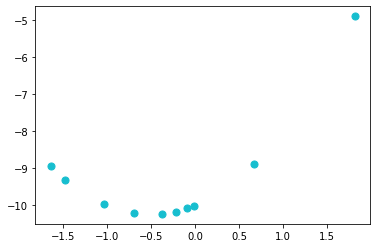

In [18]:
#这个颜色是什么颜色呢？

x1 = np.random.randn(10)           
x2 = x1 + x1**2 - 10
plt.scatter(x1,x2,s=50
            ,c=color1)
plt.show()

In [19]:
#展示除了类似于硫酸铜的蓝绿色，然而报了警告

color1

(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)

In [20]:
np.array(color1).shape

(4,)

In [21]:
np.array(color1).reshape(1,-1)

array([[0.09019608, 0.74509804, 0.81176471, 1.        ]])

In [22]:
np.array(color1).reshape(1,-1).shape #reshape：增维，输入(1,-1)是让行上的维度为1，(-1,1)是让列上的维度为1

(1, 4)

In [23]:
np.array(color1).reshape(-1,1).shape

(4, 1)

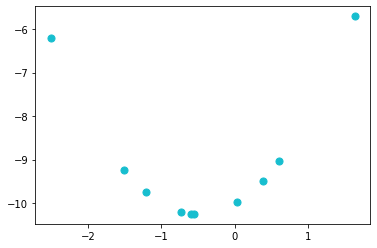

In [24]:
x1 = np.random.randn(10)
x2 = x1 + x1**2 - 10
plt.scatter(x1,x2,s=50
            ,c=np.array(color1).reshape(1,-1))
plt.show()

***5.生成基础的图像***

In [25]:
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


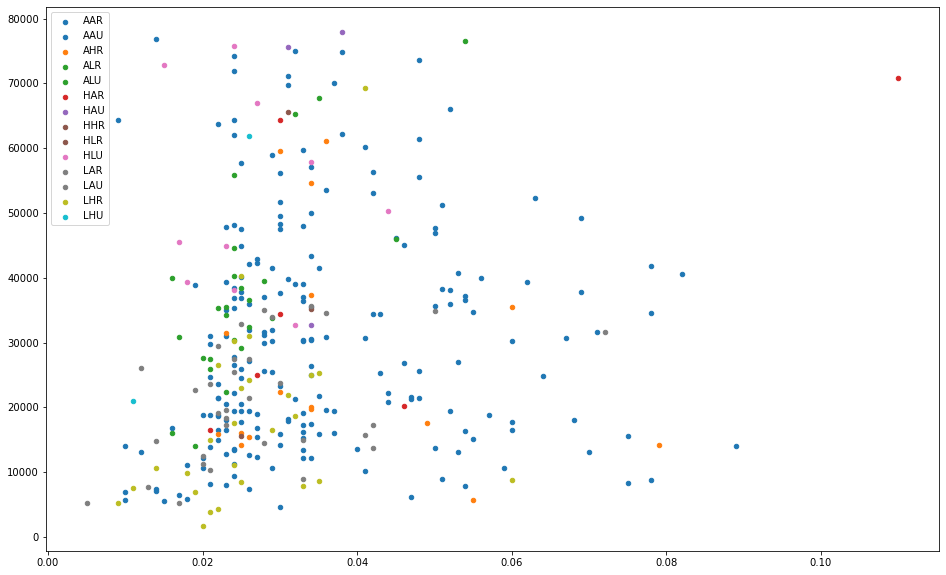

In [26]:
#只需要在循环中不断生成颜色就好了
#为了标签的名称，我们本来就需要循环和标签的类别数目一样的次数
#所以需要循环的次数 = 需要生成的颜色的次数 = 需要生成的小数的个数
#所以我们要利用循环中的i来生成14个不同的小数

plt.figure(figsize=(16,10))

for i in range(len(categories)):
    plt.scatter(midwest.loc[midwest["category"]==categories[i],"area"]
                ,midwest.loc[midwest["category"]==categories[i],"poptotal"]
                ,s=20
                ,c=np.array(plt.cm.tab10(i/len(categories))).reshape(1,-1)
                ,label=categories[i]
               )
plt.legend()
plt.show()

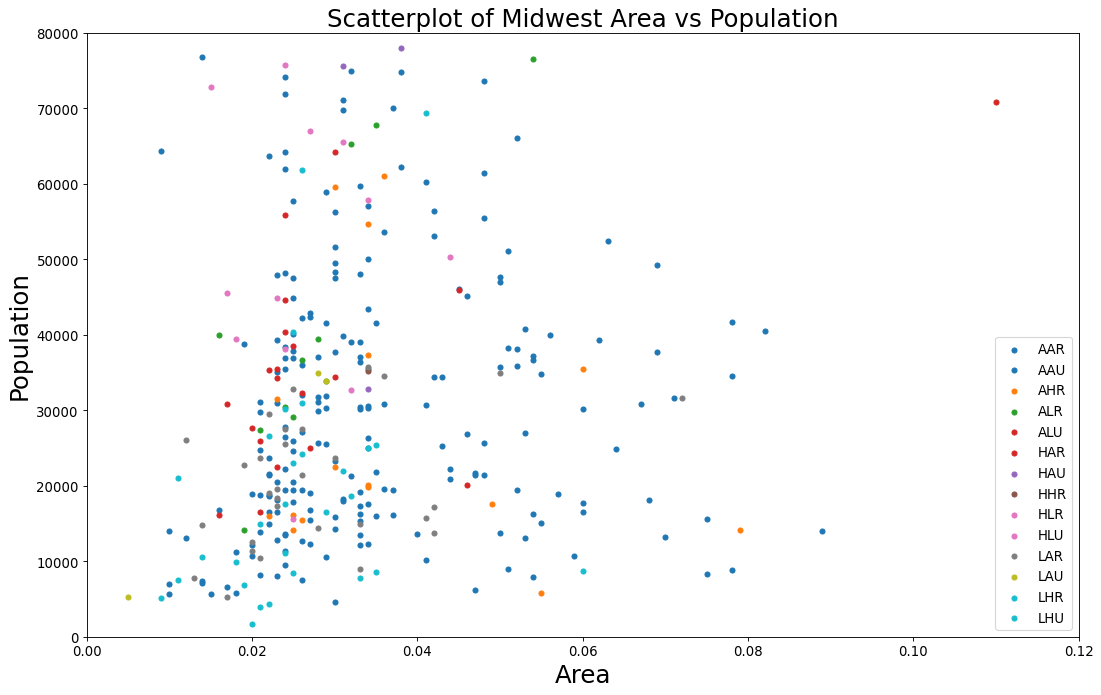

In [27]:
#丰富我们的图像

#对每一个标签类别进行绘图
plt.figure(figsize=(16, 10)   #绘图尺寸
           , dpi=80           #图像分辨率
           , facecolor='w'    #图像的背景颜色，设置为白色，默认也是白色
           , edgecolor='k'    #图像的边框颜色，设置为黑色，默认也是黑色
          )

#进行循环绘图
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :],
                s=20, c=np.array(plt.cm.tab10(i/float(len(categories)-1))).reshape(1,-1),label=str(category))

#注意到这里的数据获取方法和我们刚才写的不同了吗？

#对图像进行装饰
plt.gca().set(xlim=(0.0, 0.12), ylim=(0, 80000)) #控制横纵坐标的范围
plt.xticks(fontsize=12) #坐标轴上的标尺的字的大小
plt.yticks(fontsize=12)
plt.ylabel('Population',fontsize=22) #坐标轴上的标题和字体大小
plt.xlabel('Area',fontsize=22)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22) #整个图像的标题和字体的大小
plt.legend(fontsize=12) #图例的字体大小
plt.show()

***6.解读图像***

In [53]:
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


In [29]:
midwest[midwest['area'] > 0.1]

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
196,1248,MARQUETTE,MI,0.11,70887,644.427273,68027,1170,943,538,...,6.799415,66398,93.667386,12.608814,14.26216,11.84465,12.523891,0,HAR,171.19829


In [30]:
midwest["category"].value_counts()

AAR    186
LAR     30
LHR     27
AAU     21
AHR     16
ALU     14
ALR     11
HLU     10
HAR      6
LAU      3
HAU      3
HLR      2
LHU      2
HHR      1
Name: category, dtype: int64

In [31]:
midwest["c1"] = midwest["category"].apply(lambda x:x[0])
midwest["c2"] = midwest["category"].apply(lambda x:x[1])
midwest["c3"] = midwest["category"].apply(lambda x:x[2])

In [32]:
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size,c1,c2,c3
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411,A,A,R
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260,L,H,R
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385,A,A,R
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487,A,L,U
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161,A,A,R


In [33]:
midwest["c1"].value_counts() #average, high, low

A    248
L     62
H     22
Name: c1, dtype: int64

In [34]:
midwest["c2"].value_counts()

A    249
H     46
L     37
Name: c2, dtype: int64

In [35]:
midwest["c3"].value_counts() #rural, urban

R    279
U     53
Name: c3, dtype: int64

In [36]:
##看到这个结果，我有一个大胆的想法~如何验证我的猜测呢？我们来使用逻辑回归

In [37]:
#先处理数据集，将我们取出来的三列标签转化为数字

from sklearn.preprocessing import OrdinalEncoder as OE
data = midwest.copy()

In [39]:
data.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size,c1,c2,c3
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411,A,A,R
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260,L,H,R
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385,A,A,R
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487,A,L,U
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161,A,A,R


In [38]:
data.iloc[:,-3:].head()

,c1,c2,c3
0,A,A,R
1,L,H,R
2,A,A,R
3,A,L,U
4,A,A,R


In [40]:
data.iloc[:,-3:] = OE().fit_transform(data.iloc[:,-3:])

In [41]:
data.iloc[:,-3:].head() #average = 0,L=2,H=1

,c1,c2,c3
0,0.0,0.0,0.0
1,2.0,1.0,0.0
2,0.0,0.0,0.0
3,0.0,2.0,1.0
4,0.0,0.0,0.0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PID                   332 non-null    int64  
 1   county                332 non-null    object 
 2   state                 332 non-null    object 
 3   area                  332 non-null    float64
 4   poptotal              332 non-null    int64  
 5   popdensity            332 non-null    float64
 6   popwhite              332 non-null    int64  
 7   popblack              332 non-null    int64  
 8   popamerindian         332 non-null    int64  
 9   popasian              332 non-null    int64  
 10  popother              332 non-null    int64  
 11  percwhite             332 non-null    float64
 12  percblack             332 non-null    float64
 13  percamerindan         332 non-null    float64
 14  percasian             332 non-null    float64
 15  percother             3

In [43]:
data.dtypes.values

array([dtype('int64'), dtype('O'), dtype('O'), dtype('float64'),
       dtype('int64'), dtype('float64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('int64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('int64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('int64'), dtype('O'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64')], dtype=object)

In [44]:
data.columns = ["城市ID","郡","州","面积","总人口","人口密度","白人人口","非裔人口","美洲印第安人人口","亚洲人口","其他人种人口"
                   ,"白人所占比例","非裔所占比例","美洲印第安人所占比例","亚洲人所占比例","其他人种比例"
                   ,"成年人口","具有高中文凭的比率","大学文凭比例","有工作的人群比例"
                   ,"已知贫困人口","已知贫困人口的比例","贫困线以下的人的比例","贫困线以下的儿童所占比例","贫困的成年人所占的比例","贫困的老年人所占的比例"
                   ,"是否拥有地铁","标签","点的尺寸","c1","c2","c3"]

#去掉所有类型为”object"的列，都是无用的信息
data = data.loc[:,data.dtypes.values != "O"]

In [45]:
data

,城市ID,面积,总人口,人口密度,白人人口,非裔人口,美洲印第安人人口,亚洲人口,其他人种人口,白人所占比例,...,已知贫困人口的比例,贫困线以下的人的比例,贫困线以下的儿童所占比例,贫困的成年人所占的比例,贫困的老年人所占的比例,是否拥有地铁,点的尺寸,c1,c2,c3
0,561,0.052,66090,1270.961540,63917,1702,98,249,124,96.712059,...,96.274777,13.151443,18.011717,11.009776,12.443812,0,250.944411,0.0,0.0,0.0
1,562,0.014,10626,759.000000,7054,3496,19,48,9,66.384340,...,99.087145,32.244278,45.826514,27.385647,25.228976,0,185.781260,2.0,1.0,0.0
2,563,0.022,14991,681.409091,14477,429,35,16,34,96.571276,...,94.956974,12.068844,14.036061,10.852090,12.697410,0,175.905385,0.0,0.0,0.0
3,564,0.017,30806,1812.117650,29344,127,46,150,1139,95.254171,...,98.477569,7.209019,11.179536,5.536013,6.217047,1,319.823487,0.0,2.0,1.0
4,565,0.018,5836,324.222222,5264,547,14,5,6,90.198766,...,82.505140,13.520249,13.022889,11.143211,19.200000,0,130.442161,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,3045,0.032,75000,2343.750000,72747,454,201,494,1104,96.996000,...,95.404000,9.641804,8.699613,10.926610,6.894182,0,387.490366,0.0,0.0,0.0
328,3046,0.050,13772,275.440000,13585,25,122,33,7,98.642173,...,98.257334,15.866095,21.418598,13.642483,14.329455,0,124.233095,0.0,0.0,0.0
329,3049,0.045,46104,1024.533330,45695,22,125,92,170,99.112875,...,96.330036,8.488697,10.071411,6.953799,10.338641,0,219.578698,0.0,0.0,0.0
330,3050,0.037,19385,523.918919,19094,29,70,43,149,98.498839,...,98.854785,13.786985,20.050708,11.695784,11.804558,0,155.859825,0.0,0.0,0.0


In [46]:
#将所有为整数类型的类转换为浮点数类型
for i in range(data.loc[:,data.dtypes.values == "int64"].shape[1]):
    data.loc[i,data.dtypes.values == "int64"] = data.loc[i,data.dtypes.values == "int64"].apply(lambda x:float(x))

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   城市ID          332 non-null    float64
 1   面积            332 non-null    float64
 2   总人口           332 non-null    float64
 3   人口密度          332 non-null    float64
 4   白人人口          332 non-null    float64
 5   非裔人口          332 non-null    float64
 6   美洲印第安人人口      332 non-null    float64
 7   亚洲人口          332 non-null    float64
 8   其他人种人口        332 non-null    float64
 9   白人所占比例        332 non-null    float64
 10  非裔所占比例        332 non-null    float64
 11  美洲印第安人所占比例    332 non-null    float64
 12  亚洲人所占比例       332 non-null    float64
 13  其他人种比例        332 non-null    float64
 14  成年人口          332 non-null    float64
 15  具有高中文凭的比率     332 non-null    float64
 16  大学文凭比例        332 non-null    float64
 17  有工作的人群比例      332 non-null    float64
 18  已知贫困人口        332 non-null    

In [48]:
X = data.iloc[:,1:-3] #除了对象类的列，还有城市编号也是无用的信息，因此我们不把它作为特征矩阵的一部分
X.head()

,面积,总人口,人口密度,白人人口,非裔人口,美洲印第安人人口,亚洲人口,其他人种人口,白人所占比例,非裔所占比例,...,大学文凭比例,有工作的人群比例,已知贫困人口,已知贫困人口的比例,贫困线以下的人的比例,贫困线以下的儿童所占比例,贫困的成年人所占的比例,贫困的老年人所占的比例,是否拥有地铁,点的尺寸
0,0.052,66090.0,1270.961540,63917.0,1702.0,98.0,249.0,124.0,96.712059,2.575276,...,19.631392,4.355859,63628.0,96.274777,13.151443,18.011717,11.009776,12.443812,0.0,250.944411
1,0.014,10626.0,759.000000,7054.0,3496.0,19.0,48.0,9.0,66.384340,32.900433,...,11.243308,2.870315,10529.0,99.087145,32.244278,45.826514,27.385647,25.228976,0.0,185.781260
2,0.022,14991.0,681.409091,14477.0,429.0,35.0,16.0,34.0,96.571276,2.861717,...,17.033819,4.488572,14235.0,94.956974,12.068844,14.036061,10.852090,12.697410,0.0,175.905385
3,0.017,30806.0,1812.117650,29344.0,127.0,46.0,150.0,1139.0,95.254171,0.412257,...,17.278954,4.197800,30337.0,98.477569,7.209019,11.179536,5.536013,6.217047,1.0,319.823487
4,0.018,5836.0,324.222222,5264.0,547.0,14.0,5.0,6.0,90.198766,9.372858,...,14.475999,3.367680,4815.0,82.505140,13.520249,13.022889,11.143211,19.200000,0.0,130.442161


In [49]:
y = data.iloc[:,-3:]
y.head()

,c1,c2,c3
0,0.0,0.0,0.0
1,2.0,1.0,0.0
2,0.0,0.0,0.0
3,0.0,2.0,1.0
4,0.0,0.0,0.0


In [51]:
#然后分训练集和测试集

from sklearn.model_selection import train_test_split as TTS
Xtrain, Xtest, Ytrain, Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [52]:
Xtrain.head()

,面积,总人口,人口密度,白人人口,非裔人口,美洲印第安人人口,亚洲人口,其他人种人口,白人所占比例,非裔所占比例,...,大学文凭比例,有工作的人群比例,已知贫困人口,已知贫困人口的比例,贫困线以下的人的比例,贫困线以下的儿童所占比例,贫困的成年人所占的比例,贫困的老年人所占的比例,是否拥有地铁,点的尺寸
276,0.041,15682.0,382.487805,15001.0,375.0,125.0,56.0,125.0,95.657442,2.391277,...,12.427492,2.390578,14534.0,92.679505,14.435118,22.300831,13.310056,10.186757,0.0,137.858283
156,0.030,23265.0,775.500000,23127.0,2.0,50.0,41.0,45.0,99.406834,0.008597,...,16.583835,5.166100,22974.0,98.749194,7.704361,8.136567,6.168723,11.040340,0.0,187.881402
35,0.036,61067.0,1696.305560,51991.0,6342.0,109.0,2178.0,447.0,85.137636,10.385314,...,36.643665,14.089892,54230.0,88.804100,28.371750,26.392211,32.458483,13.815301,0.0,305.082769
161,0.031,18185.0,586.612903,17895.0,23.0,211.0,24.0,32.0,98.405279,0.126478,...,19.039803,5.014362,17942.0,98.663734,13.214803,18.758142,12.037542,9.681284,0.0,163.839599
321,0.079,14181.0,179.506329,11962.0,18.0,2167.0,15.0,19.0,84.352302,0.126930,...,17.947917,4.041667,13897.0,97.997320,20.544002,29.073570,19.195368,14.179318,0.0,112.022528


In [54]:
#恢复索引
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index = range(i.shape[0])

In [56]:
Xtrain.iloc[:,[*range(23),-1]].head()

,面积,总人口,人口密度,白人人口,非裔人口,美洲印第安人人口,亚洲人口,其他人种人口,白人所占比例,非裔所占比例,...,具有高中文凭的比率,大学文凭比例,有工作的人群比例,已知贫困人口,已知贫困人口的比例,贫困线以下的人的比例,贫困线以下的儿童所占比例,贫困的成年人所占的比例,贫困的老年人所占的比例,点的尺寸
0,0.041,15682.0,382.487805,15001.0,375.0,125.0,56.0,125.0,95.657442,2.391277,...,66.980137,12.427492,2.390578,14534.0,92.679505,14.435118,22.300831,13.310056,10.186757,137.858283
1,0.030,23265.0,775.500000,23127.0,2.0,50.0,41.0,45.0,99.406834,0.008597,...,77.877321,16.583835,5.166100,22974.0,98.749194,7.704361,8.136567,6.168723,11.040340,187.881402
2,0.036,61067.0,1696.305560,51991.0,6342.0,109.0,2178.0,447.0,85.137636,10.385314,...,78.767251,36.643665,14.089892,54230.0,88.804100,28.371750,26.392211,32.458483,13.815301,305.082769
3,0.031,18185.0,586.612903,17895.0,23.0,211.0,24.0,32.0,98.405279,0.126478,...,76.380796,19.039803,5.014362,17942.0,98.663734,13.214803,18.758142,12.037542,9.681284,163.839599
4,0.079,14181.0,179.506329,11962.0,18.0,2167.0,15.0,19.0,84.352302,0.126930,...,73.739583,17.947917,4.041667,13897.0,97.997320,20.544002,29.073570,19.195368,14.179318,112.022528


In [62]:
#标准化数据集
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(Xtrain.iloc[:,[*range(23),-1]]) #以训练集为标准的均值和方差

In [63]:
Xtrain_ = Xtrain.copy()
Xtest_ = Xtest.copy()

In [64]:
Xtrain_.iloc[:,[*range(23),-1]] = ss.transform(Xtrain.iloc[:,[*range(23),-1]])
Xtest_.iloc[:,[*range(23),-1]] = ss.transform(Xtest.iloc[:,[*range(23),-1]])

In [72]:
Xtrain_

,面积,总人口,人口密度,白人人口,非裔人口,美洲印第安人人口,亚洲人口,其他人种人口,白人所占比例,非裔所占比例,...,大学文凭比例,有工作的人群比例,已知贫困人口,已知贫困人口的比例,贫困线以下的人的比例,贫困线以下的儿童所占比例,贫困的成年人所占的比例,贫困的老年人所占的比例,是否拥有地铁,点的尺寸
0,0.616975,-0.781589,-0.817515,-0.806262,-0.109249,-0.024001,-0.298458,-0.020924,-0.560519,0.359059,...,-0.879865,-0.848804,-0.824188,-1.455058,0.342460,0.839258,0.428156,-0.582661,0.0,-0.817515
1,-0.141464,-0.374282,-0.347133,-0.350269,-0.486592,-0.330845,-0.368263,-0.341073,0.588691,-0.457448,...,-0.002157,0.773189,-0.351151,0.550676,-1.033914,-1.207832,-0.982892,-0.331241,0.0,-0.347133
2,0.272230,1.656180,0.754945,1.269442,5.927225,-0.089461,9.576664,1.267678,-3.784901,3.098491,...,4.233941,5.988182,1.400655,-2.735690,3.192365,1.430564,4.211672,0.486112,0.0,0.754945
3,-0.072515,-0.647145,-0.573205,-0.643865,-0.465347,0.327847,-0.447376,-0.393097,0.281709,-0.417052,...,0.516478,0.684514,-0.633180,0.522436,0.092918,0.327251,0.176721,-0.731545,0.0,-0.573205
4,3.237036,-0.862212,-1.060456,-0.976797,-0.470405,8.330347,-0.489259,-0.445122,-4.025610,-0.416897,...,0.285901,0.116079,-0.859890,0.302219,1.591667,1.818087,1.591028,0.593332,0.0,-1.060456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,0.065383,-0.001299,-0.179663,-0.022612,0.150744,0.397399,0.692777,-0.064944,-0.490669,0.256534,...,-0.075982,-0.123711,-0.007471,-0.242546,0.285913,0.301880,0.219839,0.327171,0.0,-0.179663
228,-0.762005,-0.023429,0.422934,-0.010547,-0.121388,-0.298115,0.008686,-0.229021,0.136854,-0.042921,...,0.201046,0.970856,-0.077922,-1.196340,-0.230306,-0.126430,-0.302913,-0.001305,0.0,0.422934
229,1.513312,2.488303,0.421563,2.543764,0.666681,0.344212,0.357712,0.699413,0.026245,0.050775,...,-0.141187,-0.595937,2.443690,-0.641223,-1.250604,-1.170644,-1.178765,-1.151419,0.0,0.421563
230,-0.693056,-1.389030,-1.037397,-1.419546,-0.219518,-0.474039,-0.531142,-0.465131,-1.339224,1.624080,...,-0.494944,-0.795734,-1.405620,-0.645554,2.537284,2.887482,2.622343,0.941432,0.0,-1.037397


In [71]:
#使用逻辑回归探索数据集
from sklearn.linear_model import LogisticRegression as logiR
import pandas as pd

for i in range(3): #三次建模，每次建模的y不同
    logi = logiR(solver="newton-cg",max_iter=100**20,multi_class="multinomial").fit(Xtrain_,Ytrain.iloc[:,i].ravel())
    print(y.columns[i])
    print("\tTrain:{}".format(logi.score(Xtrain_,Ytrain.iloc[:,i].ravel()))) #模型的学习能力，以准确率衡量
    print("\tTest:{}".format(logi.score(Xtest_,Ytest.iloc[:,i].ravel()))) #模型的泛化能力
    coeff = pd.DataFrame(logi.coef_).T #第一次运行结果logi.coef_.shape为(3,25)，3对应的是我们的三分类(A,H,L)，25对应的是25个特征 ovv AvsH, AvsL, HvsL
    if i != 2:
        coeff["mean"] = coeff.iloc[:,:-1].mean(axis=1)
        coeff["name"] = Xtrain.columns
        coeff.columns = ["Average","High","Low","mean","name"]
    else:
        coeff["name"] = Xtrain.columns
        coeff.columns = ["Coef","mean"]
    print(coeff.sort_values(by="mean",ascending=False).head())
    print("\t")

c1
	Train:0.9956896551724138
	Test:0.97
     Average      High       Low      mean       name
14  1.274035  2.189743 -3.463778  1.731889  具有高中文凭的比率
15 -0.656186  1.390281 -0.734095  0.367047     大学文凭比例
16 -0.363926  0.899042 -0.535116  0.267558   有工作的人群比例
5   0.168316  0.007686 -0.176003  0.088001   美洲印第安人人口
7   0.015589  0.106681 -0.122271  0.061135     其他人种人口
	
c2
	Train:0.978448275862069
	Test:0.97
     Average      High       Low      mean          name
20  0.248239  1.652407 -1.900646  0.950323  贫困线以下的儿童所占比例
19  0.054842  1.639717 -1.694559  0.847279    贫困线以下的人的比例
21 -0.249106  1.694901 -1.445795  0.722897   贫困的成年人所占的比例
22 -0.105854  0.797378 -0.691524  0.345762   贫困的老年人所占的比例
5   0.256889  0.219229 -0.476118  0.238059      美洲印第安人人口
	
c3
	Train:1.0
	Test:1.0
        Coef          mean
0  -0.203313            面积
9  -0.027313        非裔所占比例
4  -0.064857          非裔人口
20 -0.067184  贫困线以下的儿童所占比例
19 -0.052510    贫困线以下的人的比例
	


In [75]:
#结论：第一个字母是平均教育程度的高低(越高的话，我们的标签就是H)，第二个字母是贫困水平的高低(越穷的话，我们的标签就是H)，第三个字母是城市还是乡村
#基于这个结论，我们对于图可以分析出什么呢？

In [77]:
midwest['category'].value_counts()

AAR    186
LAR     30
LHR     27
AAU     21
AHR     16
ALU     14
ALR     11
HLU     10
HAR      6
LAU      3
HAU      3
HLR      2
LHU      2
HHR      1
Name: category, dtype: int64

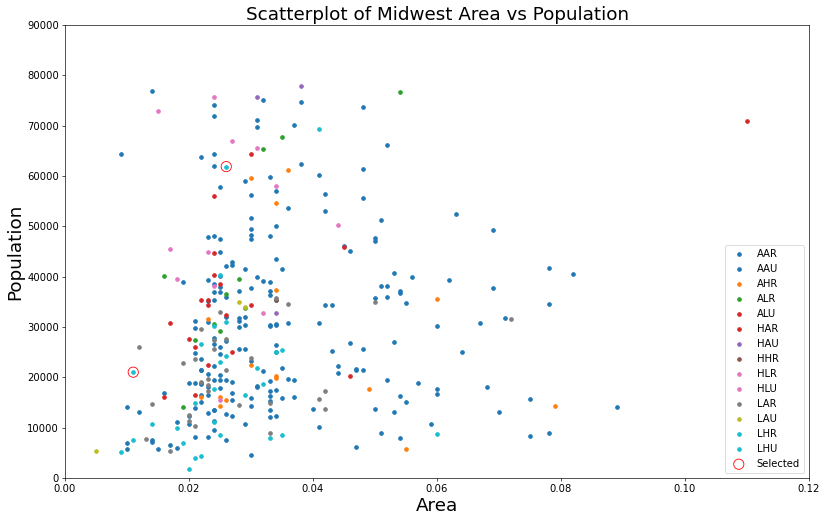

In [78]:
#丰富我们的图像

# 对每一个标签类别value_counts
plt.figure(figsize=(16, 10)   #绘图尺寸
           , dpi=60           #图像分辨率
           , facecolor='w'    #图像的背景颜色，设置为白色，默认也是白色
           , edgecolor='k'    #图像的边框颜色，设置为黑色，默认也是黑色
          )

#进行循环绘图
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :],
                s=20, c=np.array(plt.cm.tab10(i/float(len(categories)-1))).reshape(1,-1),label=str(category))


#高学历，低贫困的地方
#plt.scatter("area","poptotal",
#           data = midwest.loc[midwest.category == "HLU",:],
#            s=150,
#            facecolors="None",
#            edgecolors="red",
#            label = "Selected")

#低学历，很贫困的地方
plt.scatter("area","poptotal",
           data = midwest.loc[midwest.category == "LHU",:],
            s=150,
            facecolors="None", #点的填充颜色，为None的时候，表示点是透明的
            edgecolors="red", #点的边框现在是红色
           label = "Selected")

#对图像进行装饰
plt.gca().set(xlim=(0.0, 0.12), ylim=(0, 90000)) #控制横纵坐标的范围
plt.xticks(fontsize=12) #坐标轴上的标尺的字的大小
plt.yticks(fontsize=12)
plt.ylabel('Population',fontsize=22) #坐标轴上的标题和字体大小
plt.xlabel('Area',fontsize=22)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22) #整个图像的标题和字体的大小
plt.legend(fontsize=12) #图例的字体大小
plt.show()

In [79]:
midwest.loc[midwest["category"] == "HLU",:]

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size,c1,c2,c3
41,607,KENDALL,IL,0.018,39413,2189.61111,38019,210,73,224,...,3.385290,4.420172,2.355049,5.878511,1,HLU,367.871361,H,L,U
82,662,WOODFORD,IL,0.032,32653,1020.40625,32388,64,54,102,...,7.187707,10.013923,5.628350,7.150557,1,HLU,219.053398,H,L,U
87,668,BOONE,IN,0.024,38147,1589.45833,37814,83,90,94,...,6.296455,8.021754,5.239599,7.089425,1,HLU,291.483110,H,L,U
107,692,HANCOCK,IN,0.017,45527,2678.05882,45173,44,59,176,...,4.463412,5.627740,3.500943,6.077519,1,HLU,430.041641,H,L,U
109,694,HENDRICKS,IN,0.024,75717,3154.87500,74519,685,157,275,...,3.669048,4.228031,2.843845,6.135032,1,HLU,490.731443,H,L,U
152,749,WARRICK,IN,0.023,44920,1953.04348,44274,371,83,157,...,6.581957,8.661669,5.209342,8.198136,1,HLU,337.760716,H,L,U
172,1215,CLINTON,MI,0.034,57883,1702.44118,56639,218,276,199,...,6.017785,7.366505,4.981687,7.716216,1,HLU,305.863719,H,L,U
233,2029,DELAWARE,OH,0.027,66929,2478.85185,64888,1424,104,385,...,5.673116,6.572375,4.524411,9.064148,1,HLU,404.686310,H,L,U
311,3026,OZAUKEE,WI,0.015,72831,4855.40000,71676,492,127,438,...,2.180168,1.918955,1.938504,3.547067,1,HLU,707.176546,H,L,U
319,3036,ST CROIX,WI,0.044,50251,1142.06818,49895,44,121,148,...,6.402365,7.892108,4.972513,9.307219,1,HLU,234.538692,H,L,U


## 02/50 气泡图